In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import json
import glob
from numpyencoder import NumpyEncoder
import re

In [2]:
PATH="Dataset"
METADATA= glob.glob(f"{PATH}/**/**.json")

In [3]:
def save_meta_data(file_name,dict_file):
    with open(f'{file_name}.json', 'w') as fp:
        json.dump(dict_file, fp,  indent=4,cls=NumpyEncoder)

def read_meta_data (path):
    with open(path, 'r') as j:
        contents = json.loads(j.read())
        return contents

In [274]:
"""
Uncomment me for problem  T_316000_233500_NE_T_316000_233500_SW, T_315500_234500_SE
"""
#TODO 
# + Perbaikin code sehingga dapat ditaruh pada running awal.
# + Dan dapat dimanipulasi lebih lanjut

buff = glob.glob(f"{PATH}/T_315500_234500_SE/**.txt")
# np.savetxt("backup_buff.txt",buff,fmt="%s")
data = np.array([i.split("/") for i in buff if "building" in i or "buidling" in i])
new= data[:,-1].copy()
for i,_ in enumerate(new):
    name = new[i].split("_")
    if ".txt" in name[1]:
        buff_name = name[1]
        buff_name = buff_name.split(".")
        buff_name[0] = buff_name[0].zfill(3)
        name[1] = ".".join(buff)
        # print(name[1])
    else :
        name[1]=name[1].zfill(3)
    name[1]= "_".join(name[1])
index = data[:,-1]==new
index= np.where(index==False)[0]
data[:,-1]=new.copy()
new_data =np.array(["/".join(i) for i in data])
np.savetxt("backup_index.txt",index,fmt="%d")
for i in index:
    os.rename(buff[i],new_data[i])
METADATA_buff= read_meta_data(f'{PATH}/T_315500_234500_SE/meta_data.json')
for i in index:
    try:
        data_edited= METADATA_buff.pop(buff[i].split("/")[-1][:-4])
    except:
        continue
    list_new_data=new_data[i].split("/")
    METADATA_buff[list_new_data[-1][:-4]]={
                                            "path":"/".join(list_new_data[1:]),
                                            "jumlah_point":data_edited["jumlah_point"]
                                            }
save_meta_data(f'{PATH}/T_315500_234500_SE/meta_data',METADATA_buff)

In [268]:
new_data[i]

'Dataset/T_316000_233500_NE_T_316000_233500_SW/building_Dataset/T_316000_233500_NE_T'

In [15]:
# #FIXME
# # PERBAIKAN COUNTING UNTUK PERINSTANCE SAJA.
# # MASUKAN DATA KEDALAM SATU INSTANCE.


# def get_points_per_class(meta_data=METADATA,is_save=True,is_return=False):
#     dict_meta_data = {}
#     # indexing by unique minor id
#     for md in meta_data:
#         list_data=[]
#         with open(md,"r") as f:
#             meta= json.loads(f.read())
#         for data in meta :
#             list_name = data.split("_")
#             if len(list_name)>1:
#                 name = list_name[0]
#                 try:
#                     id = int(list_name[1])    
#                 except:
#                     id = int(list_name[2])      
#             else: 
#                 name = list_name[0]
#                 id = 1
#             list_data.append([name,id,int(meta[data]["jumlah_point"])])
#         dict_meta_data[md.split("/")[1]]= np.array(list_data)
#     dict_folder_data={}
#     for df in list(dict_meta_data.keys()):
#         array_meta_data= dict_meta_data[df]
#         dict_data ={}
#         id_class= np.unique(array_meta_data[:,0])
#         for ic in id_class:
#             buff_array_meta_data = array_meta_data[np.where(array_meta_data[:,0]==ic)]
#             unique = np.unique(buff_array_meta_data[:,1])
#             dl =[]
#             for u in unique:
#                 array_unique_meta_data= buff_array_meta_data[np.where(buff_array_meta_data[:,1]==u)]
#                 dl.append([u,np.sum(array_unique_meta_data[:,-1].astype("int32"))])
#             dict_data[ic]=dl
#         dict_folder_data[df]=dict_data
#     if is_save:
#         save_meta_data("points_per_class",dict_folder_data)
#     if not is_return:
#         return None
#     return dict_folder_data
# # get_points_per_class()

In [6]:
# c_dir = read_meta_data("points_per_class.json")
# all_data= {}
# dir_name = list(c_dir.keys())
# for i in range(len(c_dir.keys())):
#     for id in list(c_dir[dir_name[i]].keys()):
#         data = np.array(c_dir[dir_name[i]][id])[:,1].astype("int32")
#         count, hist = np.histogram(np.array(c_dir[dir_name[i]][id])[:,1].astype("int32"),bins=20)
#         c_dir[dir_name[i]][id] = [count, hist]
#         try:
#            all_data[id.lower()] = np.append(all_data[id.lower()],data)
#         except:
#             all_data[id.lower()]=data

In [7]:
# all_data["building"] = np.append(all_data["buidling"],data)
# all_data["undefined"] = np.append(all_data["undifined"],data)
# all_data.pop('undifined', None)
# all_data.pop('buidling', None)


array([108], dtype=int32)

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.rcParams.update({'font.size': 22})
# plt.rcParams["figure.figsize"] = (40,20)
# label = list(all_data.keys())[:4]
# for i in label:
#     ax = plt.hist(all_data[i],bins=30)
#     plt.title(i.upper())
#     plt.show()
#     # autolabel(ax[0])

In [276]:

def get_list_per_instace(str_name ,file_list,Area,dict_file):
    result_dict = {}
    id_ns = np.unique(np.array([b.split("_")[1] for b in dict_file],dtype="int16"))
    zf = 3 if Area ==  "T_316000_233500_NE_T_316000_233500_SW" or Area=="T_315500_234500_SE" else 2
    for idn in id_ns :
        r = re.compile(f"{str_name}_{str(idn).zfill(zf)}")
        result_dict[f"{str_name}_{str(idn).zfill(zf)}"] = list(filter(r.match, file_list)) 
    return result_dict

for i,_ in tqdm.tqdm(enumerate(METADATA),total=len(METADATA)):
    Area = METADATA[i].split("/")[1]
    md = read_meta_data(METADATA[i])
    file_names = md.keys()
    building,ground,undefined,vegetation=[],[],[],[]
    label = set([i.split("_")[0] for i in file_names])
    for fn in file_names:
        if 'building' in fn.lower() or "buidling" in fn.lower():
            building.append(fn)
        if 'ground' in fn.lower():
            ground.append(fn)
        if 'undefined' in fn.lower() or "undifined" in fn.lower() or "undefined" in fn.lower() or 'Undefined' in fn.lower():
            undefined.append(fn)
        if 'vegetation'in fn.lower():
            vegetation.append(fn)
    dict_area={
        "building":get_list_per_instace(str_name = "building",file_list = building,dict_file=building,Area=Area),
        "vegetation":vegetation,
        "ground":ground,
        "undefined":undefined
        }
    save_meta_data(f"map_ins_{Area}",dict_area)

MAPTOINST = glob.glob("map_ins**.json")


100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


In [9]:
import open3d as o3d
# pcd = o3d.io.read_point_cloud("test.txt",format='xyzrgb')


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [279]:
def maping_meta_data(class_name,map_data,meta_data):
    inst_id = {}
    try:
        for count,key in enumerate(map_data[class_name]):
            try:
                k_split = key.split("_")
                if len(k_split)==3:
                    _,sub_class,key_id = k_split
                else :
                    sub_class,key_id[:-4] = k_split
            except:
                sub_class,key_id=key,0
                
        inst_id[str(count).zfill(3)]={
            "total_point": meta_data[key]["jumlah_point"],
            "path": meta_data[key]["path"],
            "sub_class": sub_class,
            "id": str(int(key_id)-1).zfill(3)
            }
    except Exception as e:
        print(class_name)
        print(meta_data[class_name])
        inst_id["000"]={
            "total_point": meta_data[class_name]["jumlah_point"],
            "path": meta_data[class_name]["path"],
            "sub_class": "000",
            "id": "000"
            }
    return inst_id
    
def map_to_inst(map_data_json,meta_data_json):
    map_data = read_meta_data(map_data_json)
    meta_data= read_meta_data(meta_data_json)
    for k in map_data.keys():
        if k == "building":
            inst_id_building = {}
            list_build_id= list(map_data[k].keys())
            for id_b in list_build_id:
                id_ins = str(int(id_b.split("_")[-1])-1).zfill(3)
                total_point = sum([meta_data[i]["jumlah_point"] for i in map_data[list(map_data.keys())[0]][id_b]])
                list_all_txt = [meta_data[i]["path"] for i in map_data[list(map_data.keys())[0]][id_b]]
                inst_id_building[id_ins]={
                    "total_point":total_point,
                    "path":list_all_txt
                    }
        elif k=="vegetation" :
            inst_id_vegetation = maping_meta_data("vegetation",map_data,meta_data)
        elif k=="ground" :
            inst_id_ground = maping_meta_data("ground",map_data,meta_data)
        else :
            inst_id_undefined = maping_meta_data("undefined",map_data,meta_data)
    return [inst_id_building,inst_id_vegetation,inst_id_ground,inst_id_undefined]

In [280]:
for i,_ in enumerate(METADATA):
    area=METADATA[i].split("/")[1]
    ins = map_to_inst(f"map_ins_{area}.json",METADATA[i])
    
    save_meta_data(f"map_ins_{area}",{"building":ins[0],"vegetation":ins[1],"ground":ins[2],'undefined':ins[3]})

KeyError: 'total_point'

In [84]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (40,20)

In [92]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

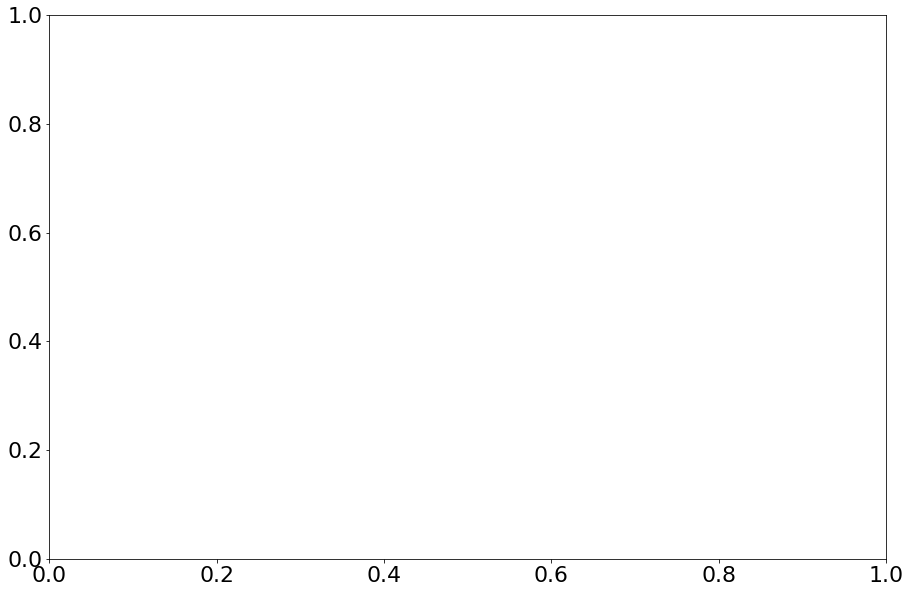

In [94]:
fig, ax = plt.subplots(figsize=(15,10))


In [93]:
plt.annotate()

AttributeError: 'numpy.ndarray' object has no attribute 'get_height'

In [95]:
rct = ax.hist(building_indices,bins=30)
autolabel(rct)

AttributeError: 'numpy.ndarray' object has no attribute 'get_height'

In [96]:
def label_densityHist(ax, n, bins, x=4, y=0.01, r=2, **kwargs):
        """
        Add labels,relative value of bin, to each bin in a density histogram .
        :param ax: Object axe of matplotlib
                The axis to plot.
        :param n: list, array of int, float
                The values of the histogram bins.
        :param bins: list, array of int, float
                The edges of the bins.
        :param x: int, float
                Related the x position of the bin labels. The higher, the lower the value on the x-axis.
                Default: 4
        :param y: int, float
                Related the y position of the bin labels. The higher, the greater the value on the y-axis.
                Default: 0.01
        :param r: int
                Number of decimal places.
                Default: 2
        :param **kwargs: Text properties in matplotlib
        :return: None


        Example

        import matplotlib.pyplot as plt
        import numpy as np

        dados = np.random.randn(100)

        axe = plt.gca()
        n, bins, _ = axe.hist(x=dados, edgecolor='black')
        label_densityHist(axe,n, bins)
        plt.show()

        Example:
        import matplotlib.pyplot as plt
        import numpy as np


        dados = np.random.randn(100)

        axe = plt.gca()
        n, bins, _ = axe.hist(x=dados, edgecolor='black')
        label_densityHist(axe,n, bins, x=6, fontsize='large')
        plt.show()


        Reference:
        [1]https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text

        """

        k = []
        # calculate the relative frequency of each bin
        for i in range(0,len(n)):
                k.append((bins[i+1]-bins[i])*n[i])

                # rounded
                k = around(k,r); #print(k)

                # plot the label/text to each bin
                for i in range(0, len(n)):
                        x_pos = (bins[i + 1] - bins[i]) / x + bins[i]
                        y_pos = n[i] + (n[i] * y)
                        label = str(k[i]) # relative frequency of each bin
                        ax.text(x_pos, y_pos, label, kwargs)

In [ ]:
label = list(data["building"].keys())
building_indices = np.array([d["total_point"] for d in data["building"].values()])
for i in label:
    # a = np.histogram(building_indices,bins=30)
    ax = plt.hist(building_indices,bins=30)
    plt.title(i.upper())
    plt.show()

In [140]:
MAPTOINST_META_LIST= glob.glob("map_**")

In [261]:
def get_combining_building_data(map_data_json = MAPTOINST_META_LIST) :   
    for i in tqdm.tqdm(range(3,len(map_data_json))):
        map_data = read_meta_data(map_data_json[i])["building"]
        buff_folder = f"all_data_building/{map_data_json[i][8:-5]}"
        os.makedirs(buff_folder,exist_ok=True)
        map_data_id= list(map_data.keys())
        for mdi in map_data_id:
            list_data_txt = map_data[mdi]["path"]
            # Start from init = 0 and append until last
            print(mdi)
            all_data = np.loadtxt(f"Dataset/{list_data_txt[0]}")[:,:6]
            try:
                for idx in range(1,len(list_data_txt)):
                    buff = np.loadtxt(f"Dataset/{list_data_txt[idx]}")[:,:6]
                    all_data = np.append(all_data,buff,axis=0)
            except :
                pass
            save_npy_loc = f"{buff_folder}/building_{mdi}.npy"
            map_data[mdi]["path_all_data"] = save_npy_loc
            np.save(f"{buff_folder}/building_{mdi}.npy",all_data,allow_pickle=True)
        save_meta_data(map_data_json[i],map_data)
 

In [ ]:
"T_315500_234500_SE"

In [262]:
get_combining_building_data()

  0%|          | 0/10 [00:00<?, ?it/s]

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


 10%|█         | 1/10 [04:11<37:39, 251.10s/it]

128
000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
059
060
061
062
063
064
065
066


 20%|██        | 2/10 [08:22<33:29, 251.15s/it]

000
001
002
003
004
005
006
007
008
009
010
011
012
013


 20%|██        | 2/10 [08:56<35:44, 268.06s/it]

014
015


IndexError: list index out of range

In [236]:
    for i in tqdm.tqdm(range(3,len(map_data_json))):
        map_data = read_meta_data(map_data_json[i])["building"]
        buff_folder = f"all_data_building/{map_data_json[i][8:-5]}"
        os.makedirs(buff_folder,exist_ok=True)
        map_data_id= list(map_data.keys())
        for mdi in map_data_id:
            list_data_txt = map_data[mdi]["path"]
            # Start from init = 0 and append until last
            print(mdi)
            all_data = np.loadtxt(f"Dataset/{list_data_txt[0]}")[:,:6]
            try:
                for idx in range(1,len(list_data_txt)):
                    buff = np.loadtxt(f"Dataset/{list_data_txt[idx]}")[:,:6]
                    all_data = np.append(all_data,buff,axis=0)
            except :
                print(e)
            save_npy_loc = f"{buff_folder}/building_{mdi}.npy"
            map_data[mdi]["path_all_data"] = save_npy_loc
            np.save(f"{buff_folder}/building_{mdi}.npy",all_data,allow_pickle=True)
        save_meta_data(map_data_json[i],map_data)

000
001
002
003
004
005
006
007
008
009
010
011


  0%|          | 0/10 [03:31<?, ?it/s]

012


IndexError: list index out of range

In [ ]:
all_data = np.loadtxt(f"Dataset/{list_data_txt[0]}")[:,:6]
try:
    for idx in range(1,len(list_data_txt)):
        buff = np.loadtxt(f"Dataset/{list_data_txt[idx]}")[:,:6]
        all_data = np.append(all_data,buff,axis=0)

In [242]:
map_data_json[i]

'map_ins_T_315500_234500_SE.json'

In [239]:
map_data[mdi]["path"]

[]

In [237]:
f"Dataset/{list_data_txt[0]}"

IndexError: list index out of range